In [2]:
import re
import matplotlib.pyplot as plt

In [3]:
path = "../../assignment1/outputs/spmcluster_slurm_randomSeed.out"
with open(path, 'r') as f:
    log_data = f.read()

# log_data

In [4]:
# Regular expressions to extract K values and times
k_values = []
plain_times = []
auto_times = []
avx_times = []

# Match "running K = X"
k_pattern = re.compile(r"running K = (\d+)")
plain_pattern = re.compile(r"softime_plain\): ([\de\.-]+)s")
auto_pattern = re.compile(r"softime_auto\): ([\de\.-]+)s")
avx_pattern = re.compile(r"softime_avx\): ([\de\.-]+)s")

In [5]:
# Extracting data
k_matches = k_pattern.findall(log_data)
plain_matches = plain_pattern.findall(log_data)
auto_matches = auto_pattern.findall(log_data)
avx_matches = avx_pattern.findall(log_data)

# Convert extracted values to float
for i in range(len(k_matches)):
    k_values.append(int(k_matches[i]))
    plain_times.append(float(plain_matches[i]))
    auto_times.append(float(auto_matches[i]))
    avx_times.append(float(avx_matches[i]))

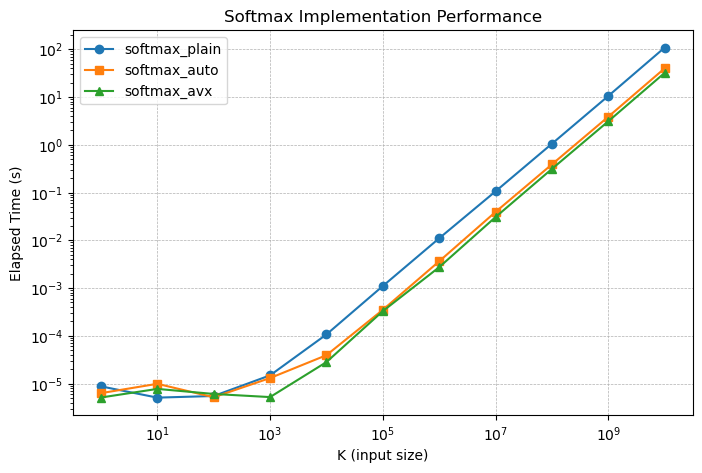

In [17]:
# Plot results
plt.figure(figsize=(8, 5))
plt.plot(k_values, plain_times, marker='o', linestyle='-', label="softmax_plain")
plt.plot(k_values, auto_times, marker='s', linestyle='-', label="softmax_auto")
plt.plot(k_values, avx_times, marker='^', linestyle='-', label="softmax_avx")

plt.xscale("log")  # Log scale for better visualization
plt.yscale("log")
plt.xlabel("K (input size)")
plt.ylabel("Elapsed Time (s)")
plt.title("Softmax Implementation Performance")
plt.legend()
plt.grid(True, which="major", linestyle="--", linewidth=0.5)
plt.savefig("rep1_softmax_performance.png", dpi=600, bbox_inches="tight")
plt.show()
